theta0_estime = 5.5274658287008736  theta1_estime =  0.9486997944551838
Erreur quadratique moyenne: 0.8376914371160101


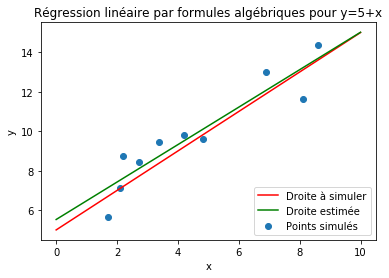

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
def eqm(Y_estime,Y,m):
    return (((Y_estime-Y)**2).sum())*1/m

# Génération de données qui suivent une distribution linéaire univariée avec résidus ~ N(0,1)
m=10 # nombre de lignes de données
theta_simule = (5,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*m # m valeurs de x entre 0 et m
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m) # Résidus N(0,1)
plt.scatter(X,Y,label = 'Points simulés') # Pour afficher les données aléatoires simulées

# Pour afficher la droite du modèle simulé
X_modele = np.arange(0,m+1,1) 
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Droite à simuler')

# Calculer les estimations de theta par les formules dérivées algébriquement
X_bar = X.sum()/m
Y_bar = Y.sum()/m
CovXY = (((X-X_bar)*(Y-Y_bar)).sum())/m
VarX = (((X-X_bar)**2).sum())/m
theta1_estime = CovXY/VarX
theta0_estime = Y_bar-theta1_estime*X_bar
print("theta0_estime =",theta0_estime," theta1_estime = ",theta1_estime)

Y_estime = theta0_estime + theta1_estime*X # Valeurs estimées pour X
print("Erreur quadratique moyenne:", eqm(Y_estime,Y,m))

# Pour afficher la droite de régression estimée
Y_droite_estimee =  theta0_estime + theta1_estime*X_modele # Valeurs estimées pour X_modele
plt.plot(X_modele, Y_droite_estimee, '-g',label = 'Droite estimée')

plt.title("Régression linéaire par formules algébriques pour y=5+x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()


thetafinal: (4.534921898969995, 1.1214091270156559)
nombre itérations: 493


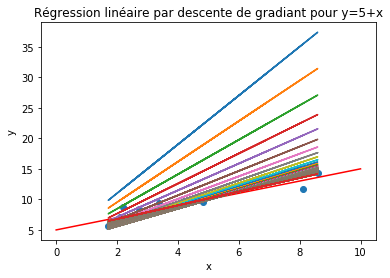

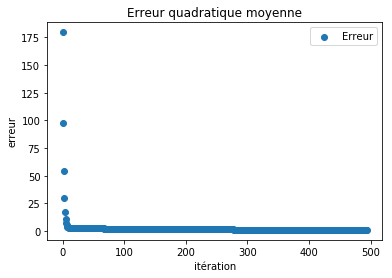

In [13]:
# Minimisation de l'erreur quadratique par descente de gradiant

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
def eqm(Y_estime,Y,m):
    return (((Y_estime-Y)**2).sum())*1/m

# Génération de données qui suivent une distribution linéaire univariée avec résidus ~ N(0,1)
m=10 # nombre de lignes de données
theta_simule = (5,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*m # m valeurs de x entre 0 et m
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m)*1.0 # Résidus N(0,1)

plt.scatter(X,Y,label = 'Points simulés') # Afficher les données aléatoires simulées

# Pour afficher la droite du modèle simulé
X_modele = np.arange(0,m+1,m) 
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Droite à simuler')

theta = (3,4) # Valeurs initiales pour les paramètres
Y_estime = h_lineaire_univarie(theta,X)
erreur_quadratique = eqm(Y_estime,Y,m)

nb_iterations = 1000
taux = 0.005
seuil = 0.001
liste_erreurs=[erreur_quadratique]

for i in range(nb_iterations) :
    # Pour afficher la droite de régression estimée actuelle
    Y_droite_estimee = h_lineaire_univarie(theta,X_modele)
    plt.plot(X, Y_estime) 

    
    # Calcul des dérivées partielles
    diffymoinsh =2*(Y_estime-Y)
    delta_theta0 = (diffymoinsh.sum())/m
    delta_theta1 = ((diffymoinsh*X).sum())/m
    
     # Calcul de la nouvelle estimation de theta
    theta_suivant = (theta[0]-taux*delta_theta0,theta[1]-taux*delta_theta1)
    
    # Calcul de l'erreur quadratique 
    Y_estime = h_lineaire_univarie(theta_suivant,X)
    erreur_quadratique_suivante = eqm(Y_estime,Y,m)
    liste_erreurs.append(erreur_quadratique_suivante) # Pour afficher le graphique de l'évolution de l'erreur
    
    if abs(erreur_quadratique - erreur_quadratique_suivante) < seuil :
        print("thetafinal:",theta_suivant)
        print("nombre itérations:",i)
        break
    else:
        theta = theta_suivant
        erreur_quadratique = erreur_quadratique_suivante

plt.title("Régression linéaire par descente de gradiant pour y=5+x")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(range(len(liste_erreurs)),liste_erreurs,label='Erreur')
plt.title("Erreur quadratique moyenne")
plt.xlabel('itération')
plt.ylabel('erreur')
plt.legend(loc='upper right')
plt.show()

Theta0: 5.5274658287008736
Theta1: 0.9486997944551838


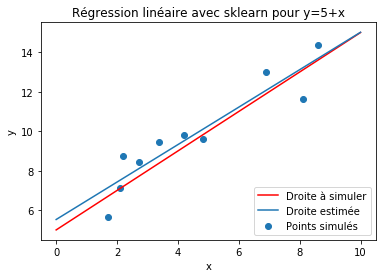

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
def eqm(Y_estime,Y,m):
    return (((Y_estime-Y)**2).sum())*1/m

# Génération de données qui suivent une distribution linéaire univariée avec résidus ~ N(0,1)
m=10 # nombre de lignes de données
theta_simule = (5,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*m # m valeurs de x entre 0 et m
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m)*1.0 # Résidus N(0,1)
plt.scatter(X,Y,label = 'Points simulés') # Pour afficher les données aléatoires simulées

# Pour afficher la droite du modèle simulé
X_modele = np.arange(0,m+1,m) 
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Droite à simuler')

# Régression linéaire avec sklearn
from sklearn.linear_model import LinearRegression
modele = LinearRegression(fit_intercept=True)
modele.fit(X[:, np.newaxis],Y) # Le paramètre X doit passer de 1D à 2D
Y_estime = modele.predict(X_modele[:, np.newaxis])
print("Theta0:", modele.intercept_)
print("Theta1:", modele.coef_[0])
plt.plot(X_modele,Y_estime,label='Droite estimée')

plt.title('Régression linéaire avec sklearn pour y=5+x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()